# TABLE OF CONTENTS
# **IEB MiM&A** 
# Introduction to Python for Data Analysis 🐍📊
# *Notebook 7: Time Series*
---

### TABLE OF CONTENTS
1. INTERACTING W/ DATES
2. BASIC OPERATIONS W/DATES
3. WORKING W/DATES ON PANDAS
4. AGGREGATING HISTORICAL DATA
5. EXERCISES

### 🧑‍🏫 Juan Martin Bellido
* [linkedin.com/in/jmartinbellido](https://www.linkedin.com/in/jmartinbellido/)
* juan.martin.bellido.arias@claustro-ieb.es



In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta

# INTERACTING W/ DATES
---
Python does not recognize date/time formats natively. Therefore, we need to work with specific libraries in order to operate with dates.






### Introduction

In [2]:
# we create our first date input
input_date = date(1969,7,20) # moon landing date
type(input_date)

datetime.date

In [4]:
# we can easily extract date components from a date input
print(input_date.day)
print(input_date.month)
print(input_date.year)
print(input_date.weekday())

20
7
1969
6


In [5]:
# we can create a list containing many date elements
date_list=[date(1989,11,1),date(1969,7,20)]
min(date_list) # we ask for the oldest date input

datetime.date(1969, 7, 20)

In [6]:
# we can build a date input dinamically, using today's date
date.today()

datetime.date(2022, 2, 22)

In [7]:
# what's today week day?
date.today().weekday()

1

### Transforming dates into string


The .strftime() method provides flexibility when extracting specific date elements.


In [11]:
# displaying current year
date.today().strftime('%Y')

'2022'

In [13]:
# displaying current month
date.today().strftime('%m')

'02'

In [12]:
# displaying current day
date.today().strftime('%d')

'22'

In [14]:
# displaying text + date
date.today().strftime('Today is %d/%m/%Y')

'Today is 22/02/2022'

In [15]:
# an alternative is using the .isoformat() method
date.today().isoformat()

'2022-02-22'

# BASIC OPERATIONS W/DATES
---


In [17]:
# we create an object with my bday
date_bday=date(1989,11,1)

In [18]:
# how many days passed since my bday?
delta = date.today() - date_bday
delta.days

11801

In [21]:
# we can use the timedelta() function to add days/weeks
date.today() + timedelta(days=5)

datetime.date(2022, 2, 27)

In [22]:
date.today() + timedelta(weeks=10)

datetime.date(2022, 5, 3)

# WORKING W/DATES ON PANDAS
---

In [23]:
# importing df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [24]:
# we use pd.to_datetime() to convert column into formal date format
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [25]:
# in case pandas does not identify date format automatically, we can provide date format in function
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'],format='%Y-%m-%d')
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [26]:
# we build a new field with year component from date
df_amzn['year'] = df_amzn['Date'].dt.year

In [27]:
# we build a new field with day name component from date
df_amzn['day_name'] = df_amzn['Date'].dt.day_name()

In [28]:
# we build a new field with week number from date
df_amzn['week_num'] = df_amzn['Date'].dt.isocalendar().week

In [29]:
# let us now visualize df
df_amzn.head()

,Date,Open,High,Low,Close,Volume,year,day_name,week_num
0,2010-01-04,136.25,136.61,133.14,133.90,7600543,2010,Monday,1
1,2010-01-05,133.43,135.48,131.81,134.69,8856456,2010,Tuesday,1
2,2010-01-06,134.60,134.73,131.65,132.25,7180977,2010,Wednesday,1
3,2010-01-07,132.01,132.32,128.80,130.00,11030124,2010,Thursday,1
4,2010-01-08,130.56,133.68,129.03,133.52,9833829,2010,Friday,1


# AGGREGATING HISTORICAL DATA
---

In [30]:
# once creating new fields with date componentes, we can use them to group our data aggregations
df_amzn.groupby(['year','week_num']).agg({'Open':'mean'})

Open
year week_num           
2010 1          133.3700
     2          129.5660
     3          126.5475
     4          123.5780
     5          118.7220
...                  ...
2017 25        1003.6940
     26         987.3720
     27         967.1325
     28         997.1340
     29        1004.6900

[394 rows x 1 columns]

In [31]:
# let us aggregate data to yearly averages
output = df_amzn.groupby('year').agg({'Open':'mean'})
output

,Open
year,
2010,138.971036
2011,196.658413
2012,220.011040
2013,297.866270
2014,332.799841
2015,478.123532
2016,699.756587
2017,900.935259


In [32]:
# we build a new field that contains average open rates from previous year
output['open_1YA'] = output['Open'].shift(1)
output

,Open,open_1YA
year,,
2010,138.971036,NaN
2011,196.658413,138.971036
2012,220.011040,196.658413
2013,297.866270,220.011040
2014,332.799841,297.866270
2015,478.123532,332.799841
2016,699.756587,478.123532
2017,900.935259,699.756587


In [34]:
# calculating YoY growth rates (%)
output['yoy_growth'] = (output['Open'] / output['open_1YA']) - 1
output['yoy_growth'] = output['yoy_growth'].round(2)
output

,Open,open_1YA,yoy_growth
year,,,
2010,138.971036,NaN,NaN
2011,196.658413,138.971036,0.42
2012,220.011040,196.658413,0.12
2013,297.866270,220.011040,0.35
2014,332.799841,297.866270,0.12
2015,478.123532,332.799841,0.44
2016,699.756587,478.123532,0.46
2017,900.935259,699.756587,0.29


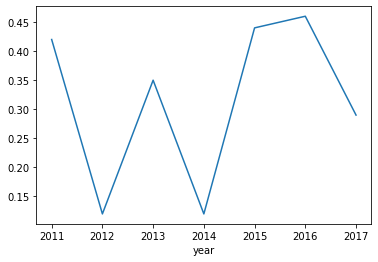

In [35]:
# finally, let's plot YoY growth rates (%)
output['yoy_growth'].plot()

# EXERCISES

##### EX 1: Wikipedia - Real Madrid
---
You are requested to:
* use Yahoo Finance API to pull Bitcoin data for the *past 28 days since Yesterday (T28D)*. Work with dates dinamically
* aggregate weekly average open rates
* build a new field that contains week on week (WoW) growth rates


In [39]:
# Importing libraries
import yfinance as yf
import pandas as pd
from datetime import date
from datetime import timedelta

In [40]:
input_start = date.today() + timedelta(days=-29)
input_end = date.today() + timedelta(days=-1)

In [41]:
output = yf.download("BTC-USD", start=input_start, end=input_end)

[*********************100%***********************]  1 of 1 completed


In [42]:
output = output.reset_index()
output.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
1,2022-01-25,36654.804688,37444.570312,35779.429688,36954.003906,36954.003906,26428189594
2,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
3,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
4,2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523


In [43]:
output['week_num'] = output.Date.dt.isocalendar().week

In [44]:
agg_output = output.groupby('week_num').agg({'Open':'mean'})

In [45]:
agg_output['open_1WA'] = agg_output['Open'].shift(1)

In [46]:
agg_output

,Open,open_1WA
week_num,,
4,37112.001674,NaN
5,38883.204799,37112.001674
6,43275.133371,38883.204799
7,41993.638393,43275.133371
8,38423.210938,41993.638393


In [47]:
agg_output['wow_growth'] = (agg_output['Open'] / agg_output['open_1WA']) - 1

In [48]:
agg_output['wow_growth'] = agg_output['wow_growth'].round(2)
agg_output

,Open,open_1WA,wow_growth
week_num,,,
4,37112.001674,NaN,NaN
5,38883.204799,37112.001674,0.05
6,43275.133371,38883.204799,0.11
7,41993.638393,43275.133371,-0.03
8,38423.210938,41993.638393,-0.09
